In [ ]:
from google.colab import drive
drive.mount('/content/drive',  force_remount=True)

In [ ]:
!cp ./drive/MyDrive/chars_dict.json .
!cp -r ./drive/MyDrive/chars/ .

In [ ]:
!ls -1q ./chars/ | wc -l

In [ ]:
import json
from string import Template
import numpy as np
# path = Template( './chars/${id}.bmp')
# path.substitute(id=counter)

in_dict = {}

with open("chars_dict.json", "r") as filez:  
    in_dict=filez.read()

in_dict = json.loads(in_dict)
digits_index_to_char = "9820765431GCIHFEDBAQORPNMLKJ<SZYXWVUT"

digits_len = []
print(len(digits_index_to_char))
for char in digits_index_to_char:
    digits_len.append(len(in_dict[char]))
    print(char, len(in_dict[char]))

print(np.amin(digits_len))


In [ ]:
digits_len = []
char_dict_normal = {}
char_dict_normal_arr = []
char_dict_normal_arr_charr = []
for char in digits_index_to_char:
    char_dict_normal[char] = in_dict[char][:1000]
    digits_len.append(len(char_dict_normal[char]))
    char_dict_normal_arr.append(char_dict_normal[char])
    char_dict_normal_arr_charr.append(np.vstack([char]*1000))
# 
# print(np.sum(digits_len))
# print(len(char_dict_normal['9']))
char_dict_normal_arr = np.array(char_dict_normal_arr).flatten()
char_dict_normal_arr_charr = np.array(char_dict_normal_arr_charr).flatten()
# print(len(char_dict_normal_arr))
# print(len(char_dict_normal_arr_charr))
# print(char_dict_normal_arr)
# print(char_dict_normal_arr_charr)
# print(char_dict_normal_arr_charr)
# char_norm_arr = np.append(char_dict_normal_arr,char_dict_normal_arr_charr, axis=1 )
char_norm_arr = np.column_stack((char_dict_normal_arr, char_dict_normal_arr_charr))
print(char_norm_arr)

[['1' '9']
 ['2' '9']
 ['3' '9']
 ...
 ['174414' 'T']
 ['174415' 'T']
 ['174416' 'T']]


In [ ]:
print(np.where(char_norm_arr[:, 0] == '6')[0][0])
print(char_norm_arr[np.where(char_norm_arr[:, 0] == '1000')[0][0]])


5
['1000' '9']


In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import os
from PIL import Image
import matplotlib.pyplot as plt

# Dataset

In [ ]:
class MRZ_Char_Dataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.truth_arr = char_norm_arr

    def __len__(self):
        return len(self.truth_arr)

    def __getitem__(self, index):
        idx, y = self.truth_arr[index]

        img_path = os.path.join(self.image_dir, f"{idx}.bmp")
        print(img_path)
        image = np.array(Image.open(img_path).convert("RGB"))

        if self.transform is not None:
            augmentations = self.transform(image=image)
            image = augmentations["image"]

        return image, y

2


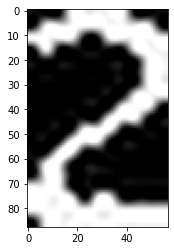

In [ ]:
train_data = MRZ_Char_Dataset('chars')
image, y = train_data[2000]
print(y)
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
from torch.utils.data import random_split

train_data = MRZ_Char_Dataset('chars')
train, val = random_split(train_data, [36000, 1000])
train_loader = DataLoader(train, batch_size=32)
val_loader = DataLoader(val, batch_size=32)


In [ ]:
# print(len(val_loader))
image, y = next(iter(train_loader))
print(y)
plt.imshow(image, cmap='gray')
plt.show()

chars/23039.bmp
chars/170244.bmp


FileNotFoundError: ignored

In [ ]:
print(np.where(char_norm_arr[:, 0] == '6')[0][0])
print(char_norm_arr[np.where(char_norm_arr[:, 0] == '170244')[0][0]])
!find ./chars/ -name "180.bmp" 
!cd ./drive/MyDrive/chars && ls | wc -l

5
['170244' 'V']
find: ‘./chars/’: No such file or directory
23059


In [ ]:
! rm -r ./chars/